In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

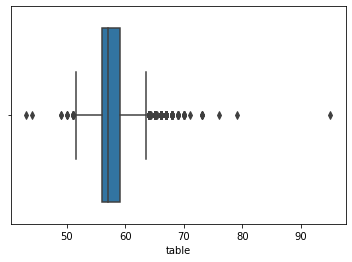

In [4]:
sns.boxplot(x = df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [9]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [10]:
alt_sinir

51.5

In [11]:
ust_sinir

63.5

In [12]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [13]:
aykiri_tf = (df_table < alt_sinir)

In [14]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [15]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [16]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykırı Değer Problemini Çözmek

In [17]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

## Silme

In [18]:
import pandas as pd

In [19]:
type(df_table)

pandas.core.series.Series

In [20]:
df_table = pd.DataFrame(df_table)

In [21]:
df_table.shape

(53940, 1)

In [22]:

t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [23]:
t_df.shape

(53335, 1)

## Ortalama ile Doldurma

In [24]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df_table = df["table"]

In [27]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [28]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [29]:
df_table.mean()

57.45718390804603

In [30]:
df_table[aykiri_tf] = df_table.mean()

<ipython-input-30-57ba1f56a480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [31]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

## Baskılama Yöntemi

In [32]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [33]:
df_table = df["table"]

In [34]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [35]:
alt_sinir

51.5

In [36]:
df_table[aykiri_tf] = alt_sinir

<ipython-input-36-e2f0da25fd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [37]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [27]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [28]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [29]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [35]:
df_scores = clf.negative_outlier_factor_

In [36]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [37]:
np.sort(df_scores)[0:20]

array([-3.80135297, -3.75680919, -3.65947378, -3.59249261, -3.55564138,
       -3.47157375, -3.45066056, -3.42193513, -3.40044967, -3.36779427,
       -3.35007989, -3.32557427, -3.29322345, -3.22070216, -3.19253942,
       -3.17216736, -3.16270895, -3.0900127 , -3.08096113, -3.07879797])

In [41]:
np.sort(df_scores)

array([-3.80135297, -3.75680919, -3.65947378, ..., -0.9162733 ,
       -0.91366494, -0.91247688])

In [42]:
np.sort(df_scores)[13]

-3.2207021637155755

In [43]:
esik_deger = np.sort(df_scores)[13]

In [44]:
aykiri_tf = df_scores > esik_deger

In [47]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [48]:
yeni_df = df[df_scores>esik_deger]

In [49]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [46]:
df[df_scores<esik_deger]

,carat,depth,table,price,x,y,z
4518,1.00,43.0,59.0,3634,6.32,6.27,3.97
8392,0.50,69.8,55.0,584,4.89,4.80,3.38
11368,1.04,62.9,43.0,4997,6.45,6.41,4.04
17717,0.50,71.0,57.0,613,4.87,4.79,3.43
21712,0.50,68.3,58.0,627,4.91,4.78,3.32
22701,0.30,64.5,49.0,630,4.28,4.25,2.75
34581,0.50,68.6,56.0,871,4.87,4.75,3.30
35753,0.46,63.4,68.0,911,4.88,4.80,3.07
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
46665,0.97,68.5,54.0,1787,6.26,6.05,4.22


In [45]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

### baskilama

In [50]:
df[df_scores== esik_deger]

,carat,depth,table,price,x,y,z
42104,0.85,71.2,54.0,1274,5.77,5.65,4.07


In [12]:
baski_deger = df[df_scores == esik_deger]

In [13]:
aykirilar = df[~aykiri_tf]

In [14]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [15]:
aykirilar.to_records(index = False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [16]:
res = aykirilar.to_records(index = False)

In [17]:
res[:] = baski_deger.to_records(index = False)

In [18]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [19]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [20]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [21]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


# Eksik Veri Analizi

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
df.isnull().sum()

In [ ]:
df.notnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.isnull()

In [ ]:
df[df.isnull().any(axis = 1)]

In [ ]:
df[df.notnull().all(axis = 1)]

In [ ]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()]

# eksik degerlerin direk silinmesi

In [ ]:
#df.dropna(inplace =True)

df.dropna()

In [ ]:
df

## basit deger atama

In [ ]:
df["V1"]

In [ ]:
df["V1"].mean()

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
df["V2"].fillna(0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

## Eksik Değerlerin Saptanması

In [ ]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

In [ ]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

In [ ]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

In [ ]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

## Eksik Veri Yapısının Görselleştirilmesi

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

In [ ]:
msno.bar(df);

In [ ]:
msno.matrix(df);

In [ ]:
df

In [ ]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
msno.matrix(df);

In [ ]:
msno.heatmap(df);

## Silme Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.dropna()

In [ ]:
df

In [ ]:
df.dropna(how = "all")

In [ ]:
df.dropna(axis = 1)

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df["sil_beni"] = np.nan

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
df

## Değer Atama Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

# sayısal degiskenlerde atama 

In [ ]:
df

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
#tum degiskenler icin birinci yol
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

# ikinci yol

In [ ]:
df.fillna(df.mean()[:])

In [ ]:
df.fillna(df.mean()["V1":"V2"])

In [ ]:
df["V3"].fillna(df["V3"].median())

## ucuncu yol

In [2]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Kategorik Değişken Kırılımında Değer Atama

In [ ]:
1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.groupby("departman")["maas"].mean()

In [ ]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

## Kategorik Değişkenler için Eksik Değer Atama

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

In [ ]:
df["departman"].mode()[0]

In [ ]:
df["departman"].fillna(df["departman"].mode()[0])

In [ ]:
df["departman"].fillna(method = "bfill")

In [ ]:
df["departman"].fillna(method = "ffill")

## Tahmine Dayalı Değer Atama Yöntemleri

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

In [ ]:
!pip install ycimpute

In [ ]:
from ycimpute.imputer import knnimput

In [ ]:
var_names = list(df)

In [ ]:
import numpy as np
n_df = np.array(df)

In [ ]:
n_df[0:10]

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k = 4).complete(n_df)

In [ ]:
type(dff)

In [ ]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
type(dff)

In [ ]:
dff.isnull().sum()

# random forests

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
df.isnull().sum()

In [ ]:
var_names = list(df)

In [ ]:
import numpy as np
n_df = np.array(df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

In [ ]:
from ycimpute.imputer import iterforest

In [ ]:
dff = iterforest.IterImput().complete(n_df)

# EM 

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
from ycimpute.imputer import EM

In [ ]:
var_names = list(df)

In [ ]:
import numpy as np
n_df = np.array(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

## Standardizasyon

In [ ]:
from sklearn import preprocessing 

In [ ]:
preprocessing.scale(df)

In [ ]:
df

## Normalizasyon

In [ ]:
preprocessing.normalize(df)

## Min-Max Dönüşümü

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [ ]:
scaler.fit_transform(df)

## Değişken Dönüşümleri

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

### 0-1 Dönüşümü

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["sex"])

In [ ]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [ ]:
df

### "1 ve Diğerleri (0) " Dönüşümü

In [ ]:
df.head()

In [ ]:
df["day"].str.contains("Sun")

In [ ]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

### Çok Sınıflı Dönüşüm

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["day"])

# cok dikkat 

In [ ]:
df.head()

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [ ]:
df.head()

In [ ]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [ ]:
df_one_hot.head()

In [ ]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

# Bölüm Sonu Değerlendirmesi

Veri Ön İşleme 

Aykırı Gözlem Analizi

Eksik Gözlem Analizi

Değişken Standartlaştırma

Değişken Dönüştürme